In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

D:\Software\anaconda 1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
# read the data and set the datetime as the index
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

bikes_df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv')
bikes_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)


In [14]:
bikes.iloc[:,-1].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64

In [10]:
# ## Visualizing the data

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

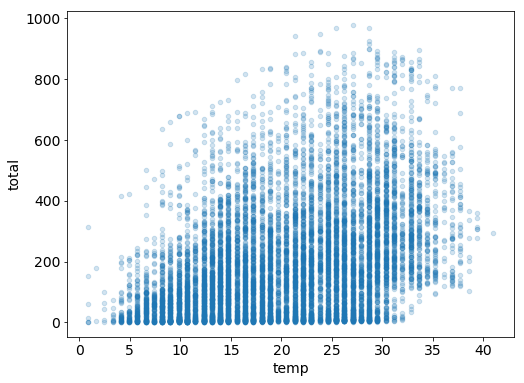

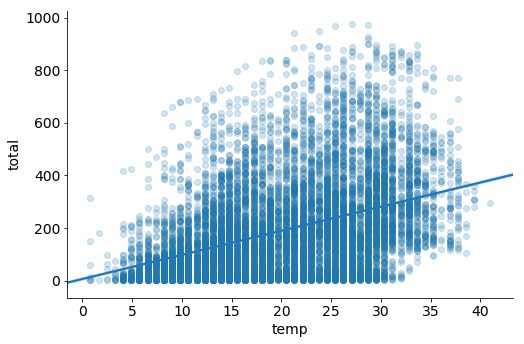

In [6]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)


# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [11]:
# create X and y
feature_cols = ['windspeed']
X = bikes[feature_cols]
y = bikes.total

In [12]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)


# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

162.78755033543862
[2.24905792]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predicted = model.predict(X_test)

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))

0.014696876913655848


In [27]:
#Case 1: when the wind speed is minimum

test_data = bikes_df.windspeed.min()
print(model.predict(test_data))
print(model.predict_proba(test_data))

[1]

[6]
[[0.00257642 0.00430947 0.00428125 0.00594358 0.00569821 0.00613335
  0.00461541 0.00522588 0.00295125 0.00450245 0.00516622 0.00306559
  0.00328198 0.00295099 0.00304204 0.0030128  0.00317261 0.00194848
  0.00225351 0.00332073 0.00275086 0.00161217 0.00296176 0.00206241
  0.00233595 0.00225874 0.0023487  0.00238672 0.00112544 0.00116535
  0.00207166 0.00186533 0.00161212 0.00237577 0.00175269 0.00179565
  0.00137469 0.00146626 0.0016109  0.00146402 0.00294176 0.0013253
  0.00136478 0.00117808 0.002122   0.0014463  0.0018621  0.00102596
  0.00129539 0.00155392 0.00155411 0.00118576 0.0016169  0.00155056
  0.0014659  0.00108466 0.00145495 0.00092487 0.00138288 0.00102988
  0.0013032  0.00113894 0.00137513 0.00206167 0.00135872 0.00150081
  0.00106133 0.00148997 0.0016625  0.00149601 0.00115661 0.00163971
  0.00114445 0.00107453 0.00157289 0.00114653 0.0008987  0.00132497
  0.00139618 0.00125678 0.00104046 0.00100767 0.00059507 0.00142923
  0.00133811 0.00156703 0.00189817 0.00154775

[1]

In [30]:
#Case 2: when the wind speed is maximum

test_data = bikes_df.windspeed.max()
print(model.predict(test_data))
print(model.predict_proba(test_data))

[0]


[1]
[[6.14538903e-02 1.85964452e-02 3.54972033e-02 6.75339796e-03
  1.56854458e-02 2.75848058e-03 6.33826241e-03 1.67687917e-03
  1.17921414e-02 1.52824926e-03 1.78833610e-03 5.46959899e-03
  1.45078612e-03 3.19092666e-03 1.11836880e-03 3.99201513e-03
  1.53295875e-03 9.79128220e-04 9.72491203e-04 7.84255241e-04
  4.00348267e-03 7.73788706e-03 1.29605457e-03 1.07660922e-03
  4.28187555e-04 2.96466841e-03 4.14180667e-04 2.26201874e-03
  2.35203933e-02 1.03402436e-02 1.81129443e-03 1.00492763e-03
  7.73890603e-03 5.92746428e-04 1.70280909e-03 7.91525491e-04
  8.45599736e-03 2.24482981e-03 2.57241401e-03 2.76204046e-03
  3.56938958e-04 8.81355023e-04 2.06768513e-03 3.29234564e-03
  7.52171319e-04 2.92307022e-03 6.45620000e-04 7.25601725e-03
  9.94477165e-04 2.07869278e-03 2.07747940e-03 2.55529601e-03
  5.14401297e-04 2.55514288e-03 1.14560727e-03 4.72633543e-03
  4.10617042e-03 1.65684743e-03 1.94014810e-03 3.02407612e-03
  2.57339129e-03 1.12993037e-02 9.55940581e-04 1.85614954e-03
  5.

[0]